# 1- importation des données 

In [1]:
#importation des bibliothèques necessaires
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix, auc
%matplotlib inline


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#importation des données
data1 = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

#  2- compréhension de données 

In [3]:
#afficher les premiers données 
print(data1.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
#Générez des statistiques descriptives
data1.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
#Détectez les valeurs manquantes pour un objet de type tableau.
data1.isna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
data1.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#vérifier qu'il n'ya pas des valeurs manquantes
data1.isna().values.any()

False

In [8]:
#vérifier qu'il n'ya pas des valeurs manquantes
data1.isna().values.any()

False

In [9]:
data1.shape

(7043, 21)

In [10]:
data1["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
data1.isnull().sum().sum()

0

In [12]:
data1.notnull().values.any()

True

In [13]:
data1.notnull().sum().sum()

147903

In [14]:
data1.fillna(data1.mean())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [15]:
#supprimer les lignes ayant des valeurs null
data1.dropna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [16]:
data1.drop(["customerID"],axis=1,inplace = True)


In [17]:
data1.shape

(7043, 20)

# 3- visualisation des données

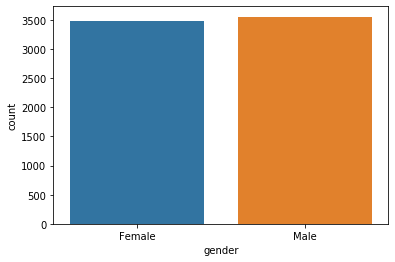

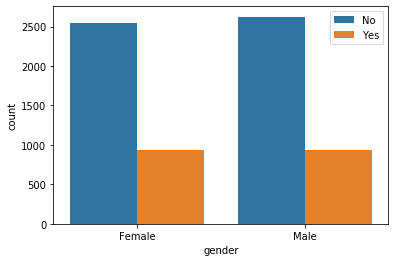

In [22]:
#visualisation du figure du sexe 
plt.figure()
sns.countplot(x="gender", data=data1)
plt.figure()
sns.countplot(x="gender", hue="Churn", data=data1)
plt.legend()


observation :il semble y avoir une répartition égale des hommes et des femmes en ce qui concerne l'intention de désabonnement

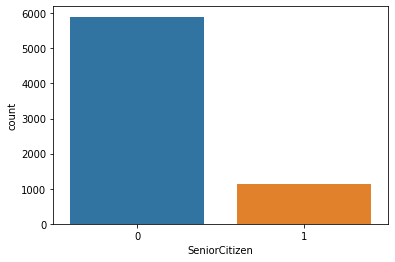

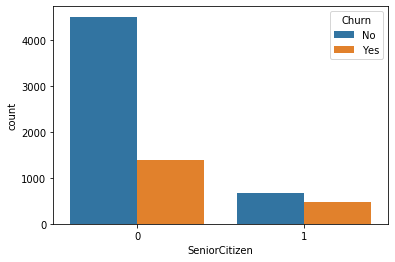

In [23]:
#visualisation du figure du citoyen senior 
plt.figure()
sns.countplot(x="SeniorCitizen", data=data1)
plt.figure()
sns.countplot(x="SeniorCitizen", hue="Churn", data=data1)


 observation :Il y a beaucoup moins de seniors qui ont l'intention de désabonner 

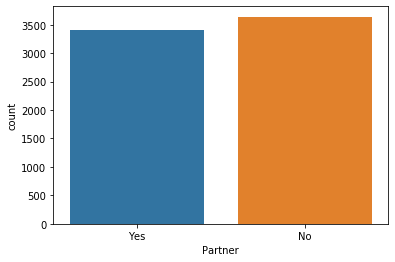

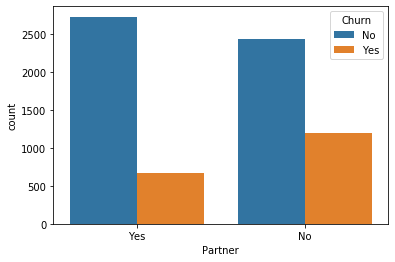

In [24]:
#visualisation du figure du partenaire
plt.figure()
sns.countplot(x="Partner", data=data1)
plt.figure()
sns.countplot(x="Partner", hue="Churn", data=data1)

Il semble y avoir une répartition égale des personnes ayant et n'ayant pas de partenaires,

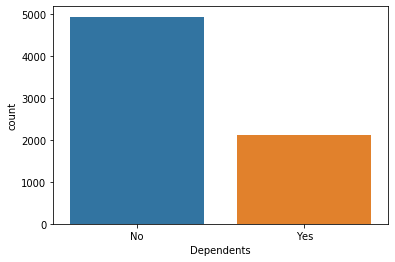

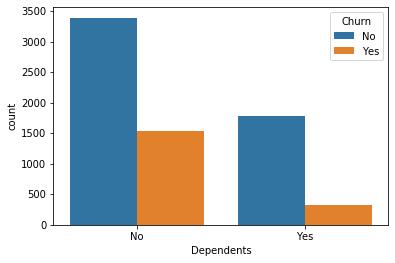

In [25]:
#visualisation du figure du citoyen dépendent 
plt.figure()
sns.countplot(x="Dependents", data=data1)
plt.figure()
sns.countplot(x="Dependents", hue="Churn", data=data1)


il y a beaucoup moins de personnes avec personnes à charge, il y a une plus grande proportion de personnes sans personne à charge

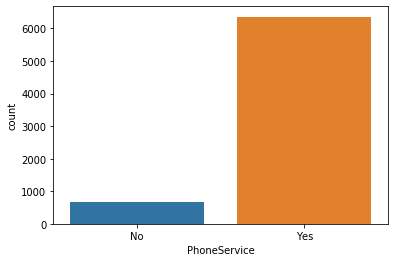

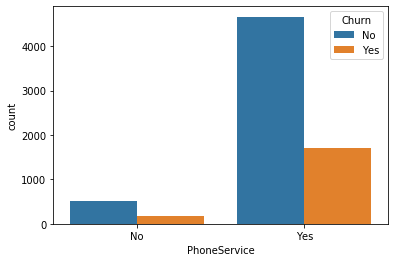

In [26]:
#visualisation du figure du téléphone service 
plt.figure()
sns.countplot(x="PhoneService", data=data1)
plt.figure()
sns.countplot(x="PhoneService", hue="Churn", data=data1)

il y a beaucoup plus de gens avec un service téléphonique qui ont l'intention de désabonnement 

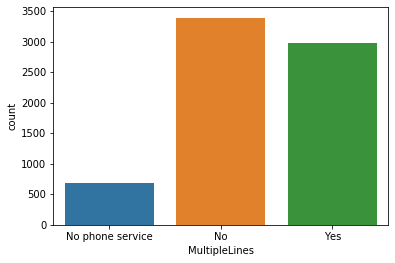

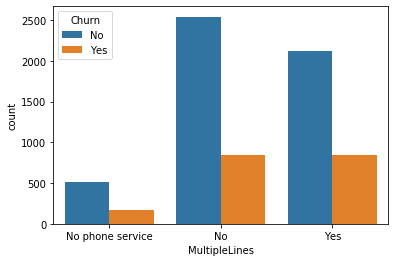

In [27]:
#visualisation du figure du multiple lignes
plt.figure()
sns.countplot(x="MultipleLines", data=data1)
plt.figure()
sns.countplot(x="MultipleLines", hue="Churn", data=data1)

le nombre de personnes qui ont et n'ont pas plusieurs lignes sont similaires

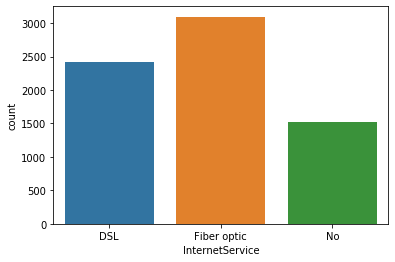

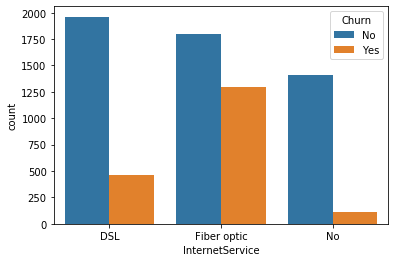

In [28]:
#visualisation du figure du service internet 
plt.figure()
sns.countplot(x="InternetService", data=data1)
plt.figure()
sns.countplot(x="InternetService", hue="Churn", data=data1)


Il y a beaucoup plus de personnes qui ont un service Internet et il y a une grande proportion de personnes avec un service Internet par fibre optique qui ont l'intention de desabonner 

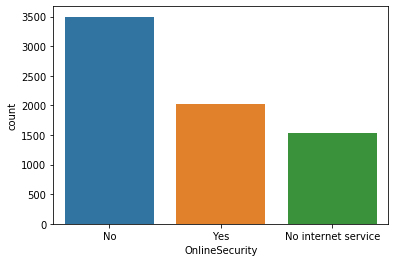

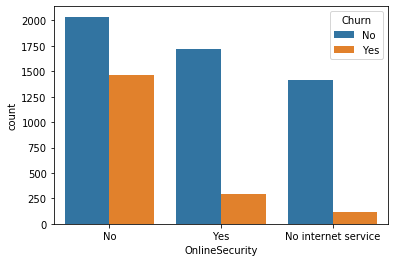

In [29]:
#visualisation du figure du securité en ligne 
plt.figure()
sns.countplot(x="OnlineSecurity", data=data1)
plt.figure()
sns.countplot(x="OnlineSecurity", hue="Churn", data=data1)

pour ceux qui disposent d'un service Internet, il y a plus de personnes sans sécurité en ligne et une grande proportion du même groupe de personnes a changé

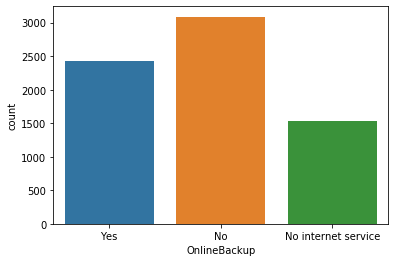

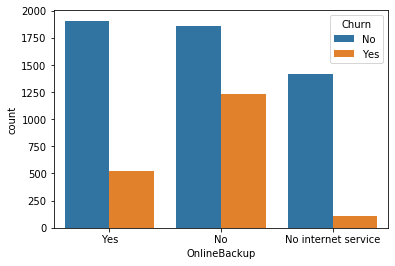

In [30]:

plt.figure()
sns.countplot(x="OnlineBackup", data=data1)
plt.figure()
sns.countplot(x="OnlineBackup", hue="Churn", data=data1)

pour ceux qui disposent d'un service Internet, il y a plus de personnes sans sauvegarde en ligne qui ont l'intention de desabonnement 

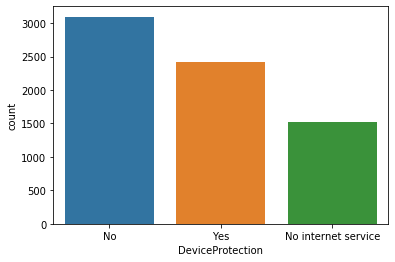

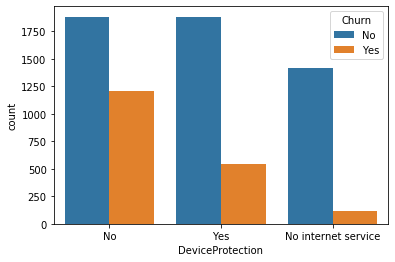

In [31]:
plt.figure()
sns.countplot(x="DeviceProtection", data=data1)
plt.figure()
sns.countplot(x="DeviceProtection", hue="Churn", data=data1)

Pour ceux qui disposent d'un service Internet, il y a plus de personnes sans protection de l'appareil qui ont l'intention de desabonnement 

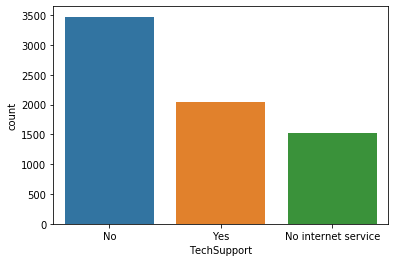

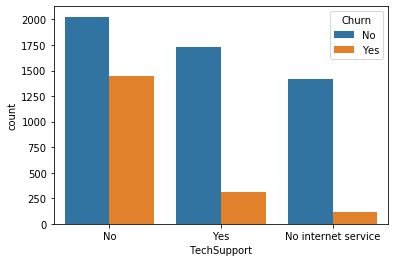

In [32]:
plt.figure()
sns.countplot(x="TechSupport", data=data1)
plt.figure()
sns.countplot(x="TechSupport", hue="Churn", data=data1)

pour ceux qui disposent d'un service Internet, il y a plus de personnes sans support technique ont l'intention de desabonnement 

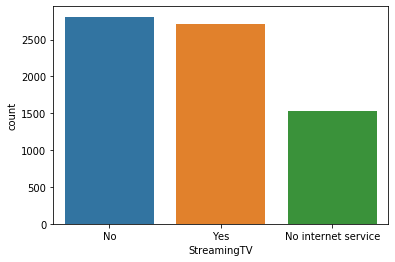

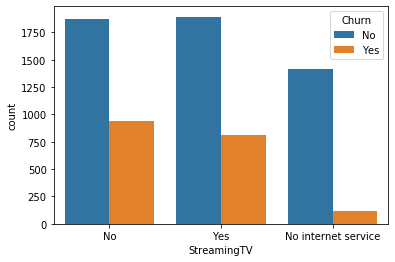

In [33]:
plt.figure()
sns.countplot(x="StreamingTV", data=data1)
plt.figure()
sns.countplot(x="StreamingTV", hue="Churn", data=data1)

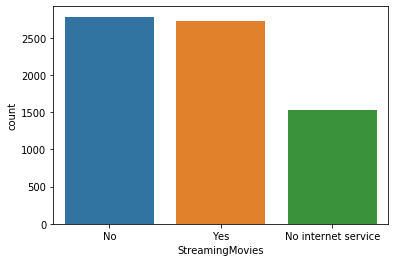

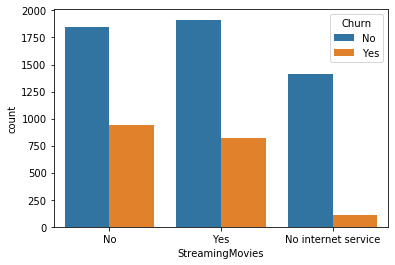

In [34]:
plt.figure()
sns.countplot(x="StreamingMovies", data=data1)
plt.figure()
sns.countplot(x="StreamingMovies", hue="Churn", data=data1)

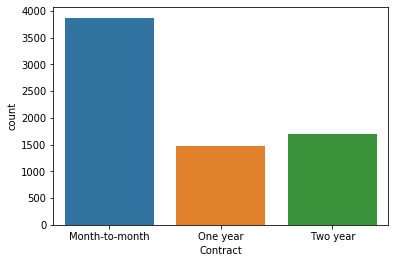

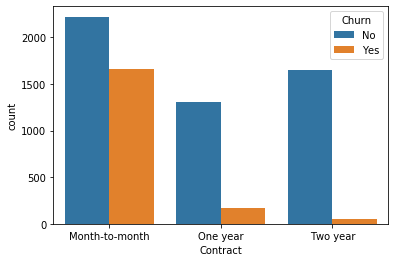

In [35]:
plt.figure()
sns.countplot(x="Contract", data=data1)
plt.figure()
sns.countplot(x="Contract", hue="Churn", data=data1)

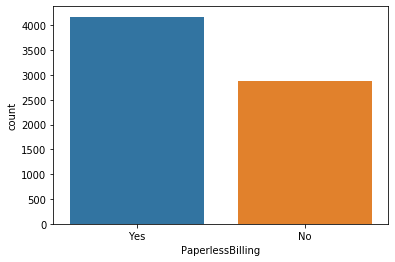

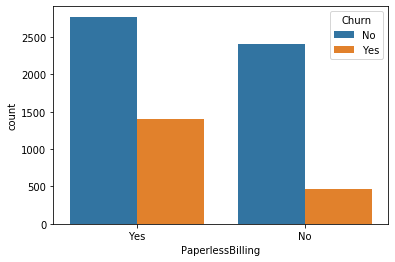

In [36]:
plt.figure()
sns.countplot(x="PaperlessBilling", data=data1)
plt.figure()
sns.countplot(x="PaperlessBilling", hue="Churn", data=data1)

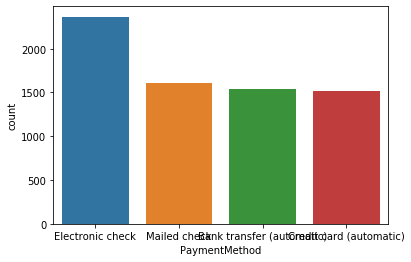

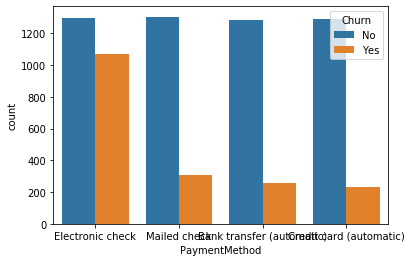

In [37]:
plt.figure()
sns.countplot(x="PaymentMethod", data=data1)
plt.figure()
sns.countplot(x="PaymentMethod", hue="Churn", data=data1)

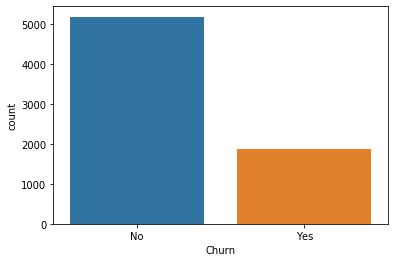

In [38]:
sns.countplot(x="Churn", data=data1)


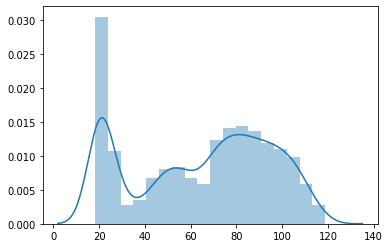

In [39]:
sns.distplot(data1["MonthlyCharges"].tolist())


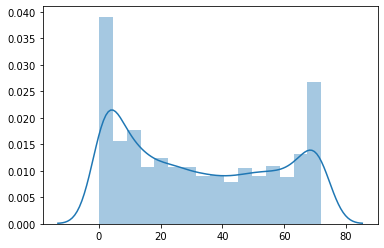

In [40]:
sns.distplot(data1["tenure"].tolist())


In [41]:
data1["tenure"].describe()


count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

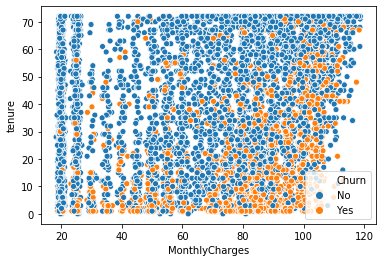

In [42]:
sns.scatterplot(x="MonthlyCharges", y="tenure", hue="Churn",
                     data=data1)

# b-data cleaning

In [18]:
data1.drop(["gender","PhoneService","MultipleLines","MonthlyCharges","TotalCharges"],axis=1,inplace = True)

In [19]:
#Remplacez les colonnes de texte par des entiers.
#Les colonnes ci-dessous incluent des valeurs de texte similaires, je les ai donc modifiées une fois.

columns_to_convert = ['Partner', 
                      'Dependents', 
                      'OnlineSecurity',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      'StreamingTV',
                      'StreamingMovies',
                      'PaperlessBilling', 
                      'Churn']

for item in columns_to_convert:
    data1[item] = [1 if each == "Yes" else 0 if each == "No" else -1 for each in data1[item]]
    
data1.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,1,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,0
1,0,0,0,34,DSL,1,0,1,0,0,0,One year,0,Mailed check,0
2,0,0,0,2,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,1
3,0,0,0,45,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),0
4,0,0,0,2,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,1


In [20]:
data1["InternetService"].replace(["Fiber optic","DSL","No"],[0,1,2],inplace= True)

In [21]:
#CONTARCT
data1["Contract"].replace(["Month-to-month","Two year","One year"],[0,1,2],inplace = True)

In [22]:
data1["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [23]:
#PAYMENT METHOD
data1["PaymentMethod"].replace(["Electronic check","Mailed check","Bank transfer (automatic)","Credit card (automatic)"],[0,1,2,3],inplace =True)

In [24]:
data1.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0
1,0,0,0,34,1,1,0,1,0,0,0,2,0,1,0
2,0,0,0,2,1,1,1,0,0,0,0,0,1,1,1
3,0,0,0,45,1,1,0,1,1,0,0,2,0,2,0
4,0,0,0,2,0,0,0,0,0,0,0,0,1,0,1


In [14]:
data1.shape

(7043, 15)

In [15]:
data1.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0
1,0,0,0,34,1,1,0,1,0,0,0,2,0,1,0
2,0,0,0,2,1,1,1,0,0,0,0,0,1,1,1
3,0,0,0,45,1,1,0,1,1,0,0,2,0,2,0
4,0,0,0,2,0,0,0,0,0,0,0,0,1,0,1


In [27]:
X= data1.iloc[:,0:14].values
y= pd.factorize(data1['Churn'])[0]

In [28]:
y

array([0, 0, 1, ..., 0, 1, 0])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# 1-Arbre de décision CART:

# a-Centrage Réduction avec MinMaxScaler():

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt = DecisionTreeClassifier(random_state=3)

In [34]:
dt.fit(X_train, y_train);

In [35]:
print('train score = ', dt.score(X_train, y_train))
print('test_score = ', dt.score(X_test, y_test))

train score =  0.9707910750507099
test_score =  0.7311878845243729


# matrice de confusion 

In [36]:
from sklearn.metrics import plot_confusion_matrix

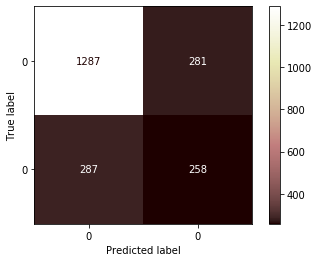

In [37]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, X_test, y_test,display_labels=data1.Churn,cmap=plt.cm.pink)  
plt.show()

In [27]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_dtc))

[[1292  276]
 [ 282  263]]


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1568
           1       0.47      0.47      0.47       545

    accuracy                           0.73      2113
   macro avg       0.64      0.64      0.64      2113
weighted avg       0.73      0.73      0.73      2113



l'application de l'arbre de décision  avec le type de scalling (MinMaxScaler ) a donnée une performence plus au moins bonne 0.73 , concernant les precisions on remarque une tres bonne prediction pour les personnes qui ne vont se désabonner (0.82) , par contre il y a une baisse de precision pour les personnes qui vont se desabonner 0.48 (a ameliorer ) .

Feature: 0, Score: 0.02714
Feature: 1, Score: 0.04361
Feature: 2, Score: 0.03309
Feature: 3, Score: 0.30084
Feature: 4, Score: 0.06440
Feature: 5, Score: 0.04463
Feature: 6, Score: 0.04598
Feature: 7, Score: 0.03968
Feature: 8, Score: 0.04041
Feature: 9, Score: 0.04295
Feature: 10, Score: 0.02828
Feature: 11, Score: 0.17623
Feature: 12, Score: 0.05140
Feature: 13, Score: 0.06135


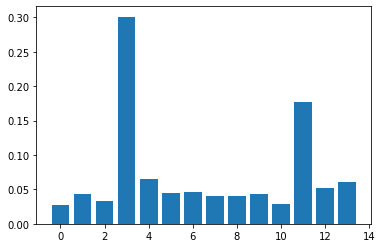

In [39]:
import matplotlib.pyplot as plt
dt.fit(X_train, y_train);
# get importance
importance = dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [40]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': np.arange(1,15)}

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5)

In [43]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [45]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [46]:
final_model = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=3 )

In [47]:
final_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [48]:
print('train score = ', final_model.score(X_train, y_train))
print('test_score = ', final_model.score(X_test, y_test))

train score =  0.7843813387423935
test_score =  0.804070042593469


Feature: 0, Score: 0.02714
Feature: 1, Score: 0.04361
Feature: 2, Score: 0.03309
Feature: 3, Score: 0.30084
Feature: 4, Score: 0.06440
Feature: 5, Score: 0.04463
Feature: 6, Score: 0.04598
Feature: 7, Score: 0.03968
Feature: 8, Score: 0.04041
Feature: 9, Score: 0.04295
Feature: 10, Score: 0.02828
Feature: 11, Score: 0.17623
Feature: 12, Score: 0.05140
Feature: 13, Score: 0.06135


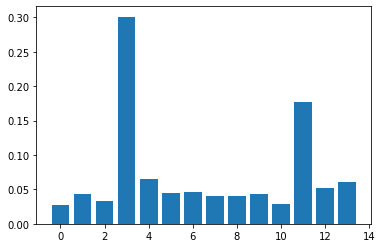

In [49]:
importance = dt.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [50]:
print('test_score = ', final_model.score(X_test, y_test))

test_score =  0.804070042593469


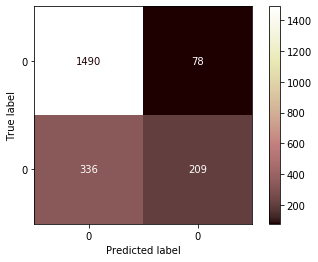

In [51]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(final_model, X_test, y_test,display_labels=data1.Churn,cmap=plt.cm.pink)  
plt.show()

In [52]:
ypred = final_model.predict(X_test)
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1568
           1       0.73      0.38      0.50       545

    accuracy                           0.80      2113
   macro avg       0.77      0.67      0.69      2113
weighted avg       0.79      0.80      0.78      2113



[Text(167.4, 190.26, 'Contract <= 0.25\ngini = 0.393\nsamples = 4930\nvalue = [3606, 1324]'),
 Text(83.7, 135.9, 'InternetService <= 0.25\ngini = 0.489\nsamples = 2722\nvalue = [1563, 1159]'),
 Text(41.85, 81.53999999999999, 'tenure <= 0.201\ngini = 0.496\nsamples = 1510\nvalue = [687, 823]'),
 Text(20.925, 27.180000000000007, 'gini = 0.431\nsamples = 705\nvalue = [222, 483]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.488\nsamples = 805\nvalue = [465, 340]'),
 Text(125.55000000000001, 81.53999999999999, 'tenure <= 0.076\ngini = 0.401\nsamples = 1212\nvalue = [876, 336]'),
 Text(104.625, 27.180000000000007, 'gini = 0.486\nsamples = 515\nvalue = [301, 214]'),
 Text(146.475, 27.180000000000007, 'gini = 0.289\nsamples = 697\nvalue = [575, 122]'),
 Text(251.10000000000002, 135.9, 'InternetService <= 0.25\ngini = 0.138\nsamples = 2208\nvalue = [2043, 165]'),
 Text(209.25, 81.53999999999999, 'tenure <= 0.979\ngini = 0.26\nsamples = 671\nvalue = [568, 103]'),
 Text(188.325000000

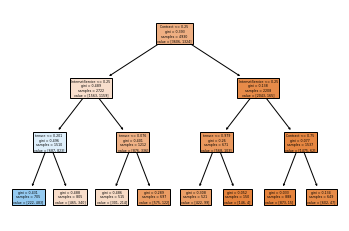

In [53]:
from sklearn.tree import plot_tree
plot_tree(final_model,feature_names = list(data1.columns[:-1]),filled=True)

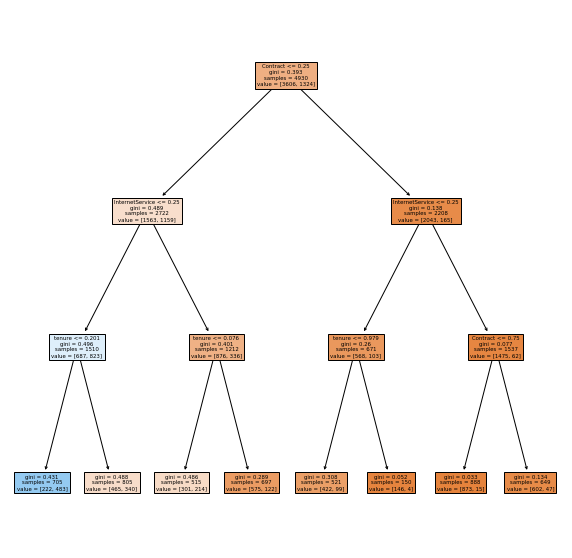

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plot_tree(final_model,feature_names = list(data1.columns[:-1]),filled=True)
plt.show()

In [65]:
from sklearn.tree import export_text
print(export_text(final_model))

|--- feature_11 <= 0.25
|   |--- feature_4 <= 0.25
|   |   |--- feature_3 <= 0.20
|   |   |   |--- class: 1
|   |   |--- feature_3 >  0.20
|   |   |   |--- class: 0
|   |--- feature_4 >  0.25
|   |   |--- feature_3 <= 0.08
|   |   |   |--- class: 0
|   |   |--- feature_3 >  0.08
|   |   |   |--- class: 0
|--- feature_11 >  0.25
|   |--- feature_4 <= 0.25
|   |   |--- feature_3 <= 0.98
|   |   |   |--- class: 0
|   |   |--- feature_3 >  0.98
|   |   |   |--- class: 0
|   |--- feature_4 >  0.25
|   |   |--- feature_11 <= 0.75
|   |   |   |--- class: 0
|   |   |--- feature_11 >  0.75
|   |   |   |--- class: 0



In [30]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [39]:
X=data1.iloc[:,:-1]
Y=data1.iloc[:,-1]

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3, random_state=0)

In [41]:
classifier=tree.DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
Y_pred=classifier.predict(X_test)

In [44]:
accuracy_score(y_test,Y_pred)

0.7330809275911027

In [45]:
confusion_matrix(y_test,Y_pred)

array([[1272,  288],
       [ 276,  277]])

In [46]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1560
           1       0.49      0.50      0.50       553

    accuracy                           0.73      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.73      0.73      0.73      2113



[Text(218.53111168032785, 213.25846153846155, 'Contract <= 0.25\ngini = 0.393\nsamples = 4930\nvalue = [3606, 1324]'),
 Text(140.69434426229506, 204.89538461538461, 'InternetService <= 0.25\ngini = 0.489\nsamples = 2722\nvalue = [1563, 1159]'),
 Text(80.6598719262295, 196.53230769230768, 'tenure <= 0.201\ngini = 0.496\nsamples = 1510\nvalue = [687, 823]'),
 Text(32.02999487704918, 188.16923076923078, 'tenure <= 0.021\ngini = 0.431\nsamples = 705\nvalue = [222, 483]'),
 Text(10.060819672131148, 179.80615384615385, 'TechSupport <= 0.75\ngini = 0.267\nsamples = 164\nvalue = [26, 138]'),
 Text(8.932131147540984, 171.44307692307692, 'PaymentMethod <= 0.833\ngini = 0.233\nsamples = 156\nvalue = [21, 135]'),
 Text(8.091147540983606, 163.07999999999998, 'Partner <= 0.5\ngini = 0.212\nsamples = 149\nvalue = [18, 131]'),
 Text(7.259016393442622, 154.71692307692308, 'OnlineSecurity <= 0.75\ngini = 0.237\nsamples = 124\nvalue = [17, 107]'),
 Text(6.975737704918032, 146.35384615384615, 'DeviceProte

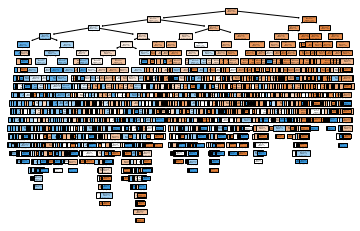

In [70]:
from sklearn.tree import plot_tree
plot_tree(dt,feature_names = list(data1.columns[:-1]),filled=True)

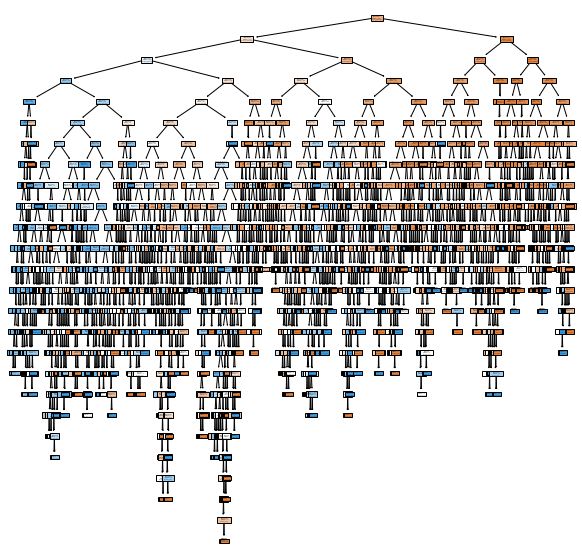

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plot_tree(dt,feature_names = list(data1.columns[:-1]),filled=True)
plt.show()

# random forest

In [56]:
data1["Churn"] = data1["Churn"].astype(int)

Y_train = data1["Churn"]
X_train = data1.drop(labels = ["Churn"],axis = 1)


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_val_score,GridSearchCV

Rfclf = RandomForestClassifier(random_state=3)
Rfclf.fit(X_train, Y_train)


RandomForestClassifier(random_state=3)

In [58]:
clf_score = cross_val_score(Rfclf, X_train, Y_train, cv=5)
print(clf_score)
clf_score.mean()

[0.79134138 0.78353442 0.76579134 0.78196023 0.78196023]


0.7809175188721854

My default random forest get around 78% accuracy from cross-validation


In [75]:
rf = RandomForestClassifier(random_state=3,**GridRF.best_params_)
rf.fit(X_train, Y_train)

RandomForestClassifier(class_weight={1: 1.5}, max_depth=3, max_features='log2',
                       n_estimators=500, random_state=3)

In [76]:
# 10 Folds Cross Validation 
clf_score = cross_val_score(rf, X_train, Y_train, cv=5)
print(clf_score)
clf_score.mean()

[0.80908446 0.80411639 0.78779276 0.79829545 0.78622159]


0.7971021315891348

In [77]:
Rfclf_fea = pd.DataFrame(rf.feature_importances_)
Rfclf_fea["Feature"] = list(X_train) 
Rfclf_fea.sort_values(by=0, ascending=False).head()

,0,Feature
11,0.286156,Contract
3,0.210337,tenure
4,0.130013,InternetService
13,0.103961,PaymentMethod
5,0.069557,OnlineSecurity


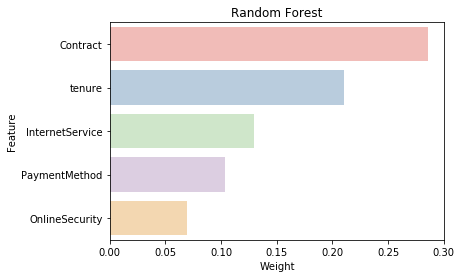

In [78]:
g = sns.barplot(0,"Feature",data = Rfclf_fea.sort_values(by=0, ascending=False)[0:5], palette="Pastel1",orient = "h")
g.set_xlabel("Weight")
g = g.set_title("Random Forest")

In [79]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_train)

print(confusion_matrix(Y_train, y_pred))

[[4489  685]
 [ 727 1142]]


In [80]:
from sklearn.metrics import classification_report

print(classification_report( Y_train, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      5174
           1       0.63      0.61      0.62      1869

    accuracy                           0.80      7043
   macro avg       0.74      0.74      0.74      7043
weighted avg       0.80      0.80      0.80      7043



In [81]:
print('train score = ', rf.score(X_train, Y_train))
print('test_score = ', rf.score(X_test, y_test))

train score =  0.7995172511713758
test_score =  0.5044959772834832


In [44]:
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
y_pred_RF=Rf.predict(X_test)

In [46]:
print("confusion matrix : ")
print(confusion_matrix(y_test, y_pred_RF))  
print(classification_report(y_test, y_pred_RF)) 
print("Accuracy score is : " , accuracy_score(y_test, y_pred_RF))

confusion matrix : 
[[1404  164]
 [ 289  256]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1568
           1       0.61      0.47      0.53       545

    accuracy                           0.79      2113
   macro avg       0.72      0.68      0.70      2113
weighted avg       0.77      0.79      0.78      2113

Accuracy score is :  0.7856128726928537


In [48]:
print('train score = ', Rf.score(X_train, y_train))
print('test_score = ', Rf.score(X_test, y_test))

train score =  0.9572008113590263
test_score =  0.7856128726928537


# KNN

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
sc=StandardScaler()



In [62]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_trainK = scaler.transform(X_train)  
X_testK = scaler.transform(X_test)

In [63]:
from sklearn.neighbors import KNeighborsClassifier  
classifierK = KNeighborsClassifier(n_neighbors=1)  
classifierK.fit(X_trainK, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [7043, 4930]